In [42]:
import torch
import torch as nn #nn contains all the modules needed to build neural networks.
import matplotlib.pyplot as plt

In [43]:
torch.__version__

'2.0.1'

# Data Preparing and Loading

Machine learning is a game of two parts:
1. Convert data into numericals
2. Build a model to learn patterns from the numerical representations of the data

In [44]:
# create *known* parameters
# Linear Regression Model (Y= aX + b)
# a = bias
# b = weight

weight = 0.7
bias = 0.3

# create Data
start = 0
end = 1
step = 0.02

X =  torch.arange(start,end,step).unsqueeze(dim=1) # Capitals are used for matrices # unsqueeze adds a dimension
y = weight*X + bias # Lowercase is used for vectors

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [45]:
len(X),len(y)

(50, 50)

## 1. Splitting data into train and test

In [46]:
train_split = int(0.8*len(X)) # 80% of the data

X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [47]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
    plt.figure(figsize=(10,7))

    #Plotting training data in blue
    plt.scatter(train_data,train_labels,c='b',s=4 ,label='Training Data')

    #Plotting test data in green
    plt.scatter(test_data,test_labels,c='g', s= 4, label='Testing Data')

    if predictions is not None:
        plt.scatter(test_data,predictions,c='r', s=4, label='Predictions')
    plt.legend(prop={'size':14})    


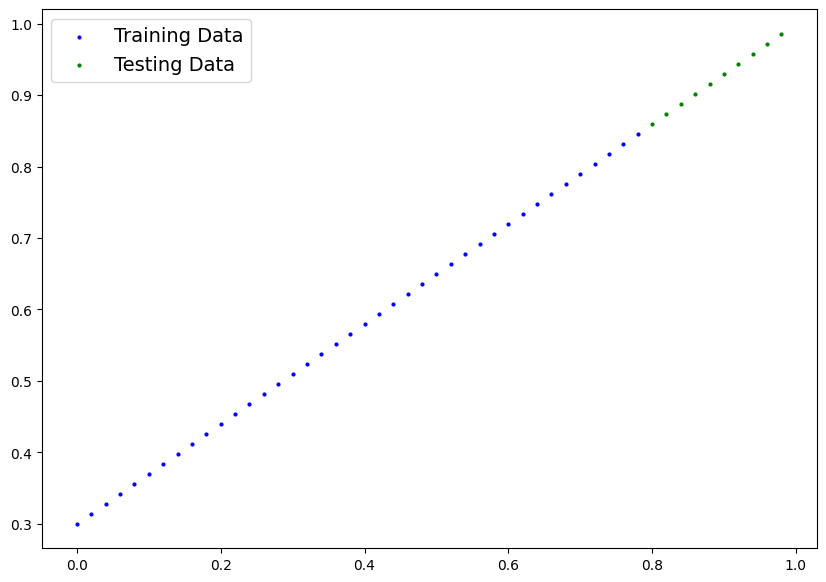

In [48]:
plot_predictions()

## 2. Build Model

What our model does?
* Start with random values(weights and bias)
* Look at training data and adjust the random values for better representation(or to get closer to the data) the ideal values (the weight and biased values we used to create our data)

two Main algorithms
1. Gradient descent
2. Back propagation

In [49]:
import torch.nn as nn

class LinearRegressionModel(nn.Module): # nn.Module is the base class for all neural network modules.
    def __init__(self):
        super().__init__()

        #Ininitalize the parameters
        self.weights = nn.Parameter(torch.rand(1,
                                               requires_grad=True,  # requires_grad=True means that the weights will be updated during training
                                               dtype= torch.float)) # dtype is the data type of the weights
        
        self.bias = nn.Parameter(torch.rand(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        
    # Forward method to define the computation in the model
    def forward(self,x:torch.Tensor):
        return self.weights*x + self.bias
        

### Pytorch model essentials

1. 'torch.nn' - contains all of the building blocks of the neural network
2. 'torch.nn.Parameter' - What parameters should our model try and learn, and what should it ignore?
3. 'torch.nn.Module' - Base class for all neural network modules, if you subclass it you should implement 'forward' methods
4. 'torch.optim' - Optimizaion in pytorch live and helps in gradient descent
5. def forward() - All nn.modules subclasses need to override forward() method which takes input tensor and returns output tensor
6. 'torch.utils.data.Dataset' - Represents a map between key(label) and sample(features) pairs of our data
7. 'torch.utils.data.DataLoader' - Combines a dataset and a sampler, and provides an iterable over the given dataset

In [50]:
torch.rand(1)

tensor([0.3829])

In [51]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [52]:
# List Named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

#### Making prediction with our random model using *inference mode*

In [53]:
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

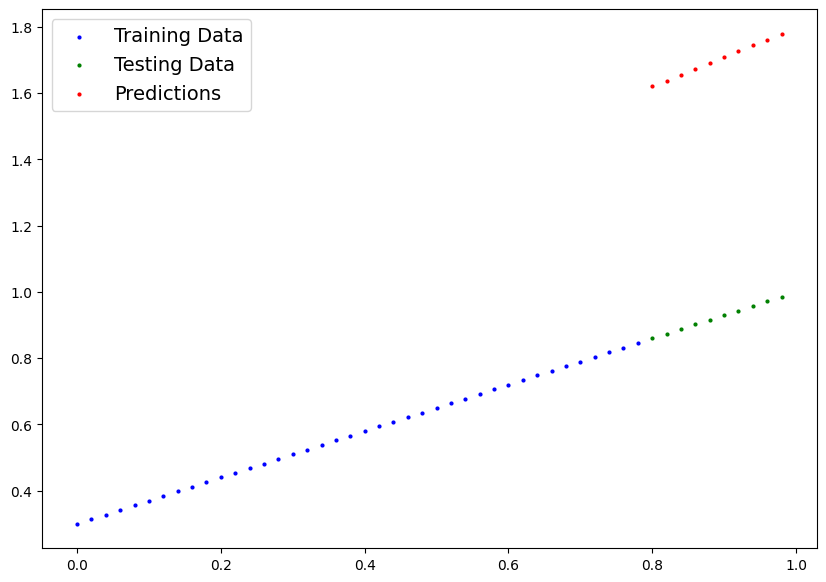

In [54]:
plot_predictions(predictions=y_preds)